## Using Data From ANES to Form A Data-Driven on Trump Voters

#### While the dataset contains information on voters of every candidate in the 2020 elctions, our interest is solely on issues that the Trump voters found important

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from scipy.stats import kurtosis, skew
from pprint import pprint
import seaborn as sns

In [2]:
# Import ANES data file; read the second tab that contains the data and index on caseid
anes_data = pd.read_excel('project_file.xlsx', 'data', index_col='caseid')

In [3]:
anes_data.head() # check the first five rows of data

,weight_pre,weight_post,sampvar,varstrat,interest_politics,interest_campaign,state_reg,party_reg,primary_voter,pol_spectrum,...,union,ethnicity,children,income,health,getcovid,satisfied,vote,whovoted,region
caseid,,,,,,,,,,,,,,,,,,,,,
200015,0.962809,1.005737,2,9,2.0,2,40.0,2.0,1.0,6.0,...,2.0,3.0,0.0,21.0,4.0,2.0,1.0,NaN,NaN,3
200022,1.069085,1.163473,2,26,4.0,3,16.0,4.0,1.0,4.0,...,2.0,4.0,1.0,13.0,3.0,2.0,3.0,1.0,3.0,4
200039,0.683421,0.768681,1,41,1.0,2,51.0,NaN,1.0,2.0,...,2.0,1.0,2.0,17.0,4.0,2.0,3.0,1.0,1.0,3
200046,0.500953,0.52102,2,29,2.0,3,6.0,2.0,2.0,3.0,...,2.0,4.0,1.0,7.0,3.0,2.0,1.0,1.0,1.0,4
200053,1.262294,0.965789,1,23,2.0,2,8.0,4.0,1.0,5.0,...,2.0,5.0,0.0,22.0,3.0,2.0,2.0,1.0,2.0,4


In [4]:
anes_data.tail() # check the last five rows of data

,weight_pre,weight_post,sampvar,varstrat,interest_politics,interest_campaign,state_reg,party_reg,primary_voter,pol_spectrum,...,union,ethnicity,children,income,health,getcovid,satisfied,vote,whovoted,region
caseid,,,,,,,,,,,,,,,,,,,,,
535315,1.052041,2.541941,1,3,1.0,1,12.0,2.0,2.0,NaN,...,2.0,1.0,2.0,8.0,2.0,2.0,2.0,NaN,NaN,3
535360,1.124100,0.907123,2,5,4.0,2,16.0,2.0,2.0,6.0,...,2.0,1.0,0.0,19.0,3.0,2.0,1.0,1.0,2.0,4
535414,1.514417,0.654863,1,8,2.0,1,6.0,1.0,1.0,4.0,...,2.0,3.0,0.0,16.0,3.0,2.0,2.0,1.0,1.0,4
535421,0.292352,0.161853,2,8,2.0,1,51.0,NaN,2.0,6.0,...,2.0,1.0,0.0,14.0,1.0,2.0,1.0,NaN,NaN,3
535469,0.248581,0.206418,2,10,2.0,1,51.0,NaN,1.0,2.0,...,1.0,4.0,1.0,15.0,2.0,2.0,1.0,1.0,1.0,3


### Data Cleaning and Preprocessing

In [5]:
# Quick inspection of file structure, i.e. columns, null (missing values), data types
anes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8280 entries, 200015 to 535469
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   weight_pre          8280 non-null   float64
 1   weight_post         8280 non-null   object 
 2   sampvar             8280 non-null   int64  
 3   varstrat            8280 non-null   int64  
 4   interest_politics   8279 non-null   float64
 5   interest_campaign   8280 non-null   int64  
 6   state_reg           7562 non-null   float64
 7   party_reg           4259 non-null   float64
 8   primary_voter       8261 non-null   float64
 9   pol_spectrum        7056 non-null   float64
 10  party_id            8245 non-null   float64
 11  party_salience      7945 non-null   float64
 12  gov_trust           8243 non-null   float64
 13  gov_interests       8178 non-null   float64
 14  gov_waste           8251 non-null   float64
 15  gov_corrup          8209 non-null   float64
 16 

#### The results of the data structure shows that we have a lot of missing data; we will clean this up by dropping the missing/empty cells in the excel file

In [6]:
# Drop all Nulls
anes_data = anes_data.dropna()

In [7]:
# Re-evaluate the file structure after dropping missing values
anes_data = anes_data.dropna()
anes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1550 entries, 200046 to 535414
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   weight_pre          1550 non-null   float64
 1   weight_post         1550 non-null   object 
 2   sampvar             1550 non-null   int64  
 3   varstrat            1550 non-null   int64  
 4   interest_politics   1550 non-null   float64
 5   interest_campaign   1550 non-null   int64  
 6   state_reg           1550 non-null   float64
 7   party_reg           1550 non-null   float64
 8   primary_voter       1550 non-null   float64
 9   pol_spectrum        1550 non-null   float64
 10  party_id            1550 non-null   float64
 11  party_salience      1550 non-null   float64
 12  gov_trust           1550 non-null   float64
 13  gov_interests       1550 non-null   float64
 14  gov_waste           1550 non-null   float64
 15  gov_corrup          1550 non-null   float64
 16 

### After dropping the missing empty cells, we now have 1550 fully pupulated rows of voter data

In [8]:
# Review the columns
anes_data.columns

Index(['weight_pre', 'weight_post', 'sampvar', 'varstrat', 'interest_politics',
       'interest_campaign', 'state_reg', 'party_reg', 'primary_voter',
       'pol_spectrum', 'party_id', 'party_salience', 'gov_trust',
       'gov_interests', 'gov_waste', 'gov_corrup', 'people_trusted',
       'gov_responsive', 'better_economy', 'better_health',
       'better_immigratino', 'better_taxes', 'better_environment',
       'better_covid', 'fav_deathpen', 'stayhome', 'trust_media', 'corr_trump',
       'fav_impeach', 'fav_senacquittal', 'covid_gov', 'covid_reopen',
       'inc_gap', 'gov_climate', 'samesex', 'transgender', 'lgbtlaw',
       'birthright', 'deportkids', 'wall', 'russianinterfere', 'religion',
       'age', 'marital', 'education', 'spouse_edu', 'armedforces', 'labor',
       'union', 'ethnicity', 'children', 'income', 'health', 'getcovid',
       'satisfied', 'vote', 'whovoted', 'region'],
      dtype='object')

In [9]:
# Because we are investigating voters, we will put 'whovoted' in the last column
# As part of this code, we will also drop columns we do not believe add any value to our analysis; these columns are:
# 'weight_pre', 'weight_post', and 'sampvar'
anes_data = anes_data[['interest_politics', 'interest_campaign',
       'state_reg', 'party_reg', 'primary_voter', 'pol_spectrum', 'party_id',
       'party_salience', 'gov_trust', 'gov_interests', 'gov_waste',
       'gov_corrup', 'people_trusted', 'gov_responsive', 'better_economy',
       'better_health', 'better_immigratino', 'better_taxes',
       'better_environment', 'better_covid', 'fav_deathpen', 'stayhome',
       'trust_media', 'corr_trump', 'fav_impeach', 'fav_senacquittal',
       'covid_gov', 'covid_reopen', 'inc_gap', 'gov_climate', 'samesex',
       'transgender', 'lgbtlaw', 'birthright', 'deportkids', 'wall',
       'russianinterfere', 'religion', 'age', 'marital', 'education',
       'spouse_edu', 'armedforces', 'labor', 'union', 'ethnicity', 'children',
       'income', 'health', 'getcovid', 'satisfied', 'region', 'whovoted']]

In [10]:
# check the columns to make sure the objectives are achieved
anes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1550 entries, 200046 to 535414
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   interest_politics   1550 non-null   float64
 1   interest_campaign   1550 non-null   int64  
 2   state_reg           1550 non-null   float64
 3   party_reg           1550 non-null   float64
 4   primary_voter       1550 non-null   float64
 5   pol_spectrum        1550 non-null   float64
 6   party_id            1550 non-null   float64
 7   party_salience      1550 non-null   float64
 8   gov_trust           1550 non-null   float64
 9   gov_interests       1550 non-null   float64
 10  gov_waste           1550 non-null   float64
 11  gov_corrup          1550 non-null   float64
 12  people_trusted      1550 non-null   float64
 13  gov_responsive      1550 non-null   float64
 14  better_economy      1550 non-null   float64
 15  better_health       1550 non-null   float64
 16 

In [11]:
# Mow we inspect the candidate options in 'whovoted' column
anes_data.whovoted.value_counts()

1.0     883
2.0     642
5.0      11
3.0      10
12.0      2
4.0       2
Name: whovoted, dtype: int64

### The result shows that 883 voted for Biden, 642 voted for Trump, and the rest voted for other candidates. However, because our purpose is to understand issues pertinent to Trump voters we will only focus on the 642 Trump voters

In [12]:
# Create a new dataframe for only Trump voters (642)
#iris_df[iris_df.Target==1].head()
#iris_df.loc[iris_df['Target'] == 1].head()
trump = anes_data[anes_data['whovoted'] == 2]

In [13]:
trump.shape

(642, 53)

In [14]:
# inspect the structure of the newly created dataframe holding only Trump voters
trump.head()

,interest_politics,interest_campaign,state_reg,party_reg,primary_voter,pol_spectrum,party_id,party_salience,gov_trust,gov_interests,...,labor,union,ethnicity,children,income,health,getcovid,satisfied,region,whovoted
caseid,,,,,,,,,,,,,,,,,,,,,
200558,1.0,1,20.0,2.0,2.0,7.0,7.0,1.0,4.0,2.0,...,1.0,2.0,1.0,1.0,19.0,3.0,2.0,3.0,2,2.0
200831,1.0,1,6.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0,...,5.0,1.0,1.0,0.0,17.0,2.0,2.0,3.0,4,2.0
201001,2.0,3,12.0,4.0,2.0,4.0,5.0,2.0,3.0,1.0,...,2.0,2.0,1.0,0.0,6.0,3.0,2.0,3.0,3,2.0
201032,1.0,2,40.0,1.0,2.0,5.0,5.0,5.0,4.0,1.0,...,5.0,2.0,1.0,0.0,18.0,2.0,2.0,1.0,3,2.0
201063,1.0,1,4.0,2.0,1.0,7.0,7.0,1.0,2.0,1.0,...,5.0,2.0,1.0,0.0,10.0,2.0,2.0,1.0,4,2.0


In [15]:
# inspect Trump file to ensure we have 642 records across 53 columns
trump.shape

(642, 53)

### Now that we have prepared our dataset, it is time for Exploratory Data Analysis

In [16]:
### Interest in Politics
trump.interest_politics.value_counts()

2.0    283
1.0    173
3.0    119
4.0     66
5.0      1
Name: interest_politics, dtype: int64

<AxesSubplot:>

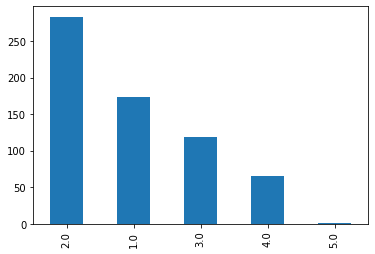

In [17]:
### Option 2 means 'Most of the time'. We will chart visualize this field
trump.interest_politics.value_counts().plot(kind='bar')

####  While the visuals are clear, it is better to normalize the numbers as percentages; this sends a much clearer message across the different polling categories

In [18]:
trump.interest_politics.value_counts(normalize=True)

2.0    0.440810
1.0    0.269470
3.0    0.185358
4.0    0.102804
5.0    0.001558
Name: interest_politics, dtype: float64

<AxesSubplot:>

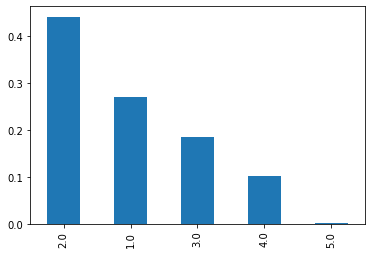

In [19]:
trump.interest_politics.value_counts(normalize=True).plot(kind='bar')

#### About 70% of Trump voters pay attention to politics and elections Most of the Time and All of the time

In [20]:
trump.interest_campaign.value_counts(normalize=True)

1    0.552960
2    0.336449
3    0.110592
Name: interest_campaign, dtype: float64

<AxesSubplot:>

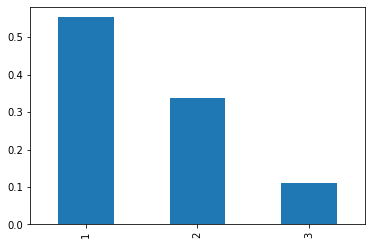

In [21]:
trump.interest_campaign.value_counts(normalize=True).plot(kind='bar')

#### More than 88% of Trump voters are somewhat or very much interested in following campaigns

In [22]:
trump.state_reg.value_counts(normalize=True).sort_values(ascending=False).head(5)

12.0    0.127726
6.0     0.112150
42.0    0.077882
37.0    0.076324
36.0    0.059190
Name: state_reg, dtype: float64

<AxesSubplot:>

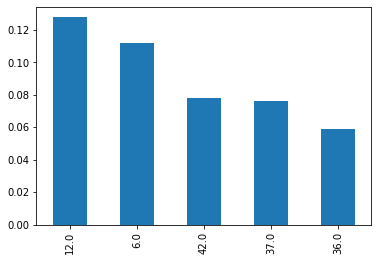

In [23]:
trump.state_reg.value_counts(normalize=True).sort_values(ascending=False).head(5).plot(kind='bar')

#### This graph shows the top five states with Trump voters (not as percentage of population). Florida = 12.8%, California = 11.2%, Pennsylvania = 7.8%, N. Carolina = 7.6% and New York = 5.9%

In [24]:
trump.gov_waste.value_counts(normalize=True).sort_values(ascending=False)

1.0    0.777259
2.0    0.210280
3.0    0.012461
Name: gov_waste, dtype: float64

<AxesSubplot:>

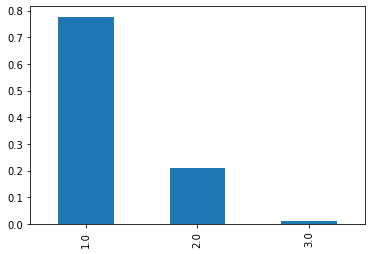

In [25]:
trump.gov_waste.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

#### Almost all of Republican voters (~99%) of Republican voters believe that the government wastes tax dollars

In [26]:
trump.party_reg.value_counts(normalize=True).sort_values(ascending=False)

2.0    0.685358
4.0    0.227414
1.0    0.080997
5.0    0.006231
Name: party_reg, dtype: float64

<AxesSubplot:>

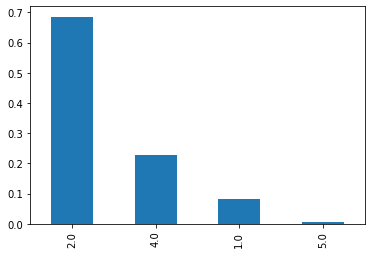

In [27]:
trump.party_reg.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

#### While about 68% of registered Republicans voted for Trump, interestingly, 32% of Trump voters were either Democrats, Independents or from another party or wrte-in candidate

In [28]:
trump.gov_corrup.value_counts(normalize=True).sort_values(ascending=False)

3.0    0.380062
2.0    0.319315
4.0    0.263240
1.0    0.026480
5.0    0.010903
Name: gov_corrup, dtype: float64

<AxesSubplot:>

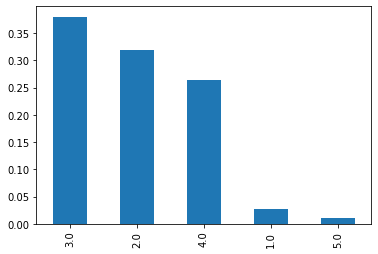

In [29]:
trump.gov_corrup.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

#### About 70% of Trump voters believe that the government is corrupt

In [30]:
trump.better_immigratino.value_counts(normalize=True).sort_values(ascending=False)

5.0    0.697819
4.0    0.194704
3.0    0.074766
2.0    0.020249
1.0    0.012461
Name: better_immigratino, dtype: float64

<AxesSubplot:>

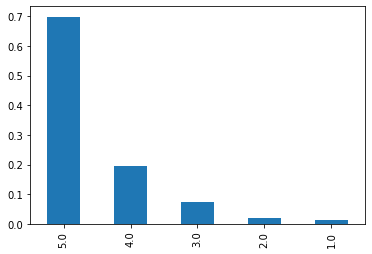

In [31]:
trump.better_immigratino.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

#### 70% of Trump voters believe the Republicans do a better job with Immigration

In [32]:
trump.better_covid.value_counts(normalize=True).sort_values(ascending=False)

5.0    0.395639
3.0    0.341121
4.0    0.214953
2.0    0.029595
1.0    0.018692
Name: better_covid, dtype: float64

<AxesSubplot:>

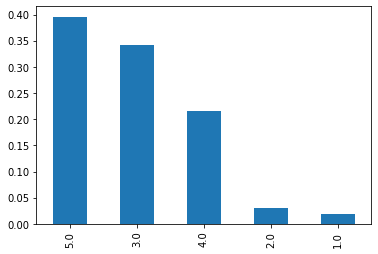

In [33]:
trump.better_covid.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

#### Only 40% of Trump voters believe that the Republican party will do a better job at tackling Covid

In [34]:
trump.fav_deathpen.value_counts(normalize=True).sort_values(ascending=False)

1.0    0.619938
2.0    0.233645
3.0    0.090343
4.0    0.056075
Name: fav_deathpen, dtype: float64

<AxesSubplot:>

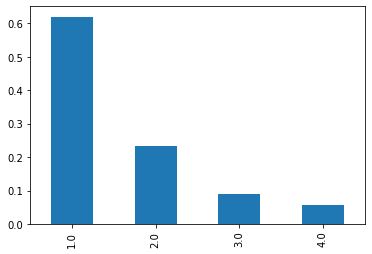

In [35]:
trump.fav_deathpen.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

#### 62% of Trump voters strongly favor the death penalty

In [36]:
trump.trust_media.value_counts(normalize=True).sort_values(ascending=False)

1.0    0.619938
2.0    0.264798
3.0    0.088785
4.0    0.018692
5.0    0.007788
Name: trust_media, dtype: float64

<AxesSubplot:>

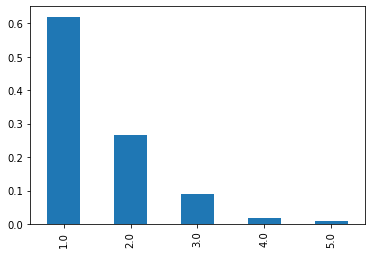

In [37]:
trump.trust_media.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

#### About 88% of Trump voters have little or no trust in the media

In [38]:
trump.fav_senacquittal.value_counts(normalize=True).sort_values(ascending=False)

1.0    0.761682
4.0    0.107477
2.0    0.093458
7.0    0.012461
6.0    0.012461
3.0    0.010903
5.0    0.001558
Name: fav_senacquittal, dtype: float64

<AxesSubplot:>

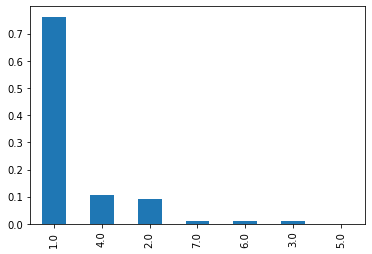

In [39]:
trump.fav_senacquittal.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

#### 76% of Trump voters strongly favored his acquittal by the senate

In [40]:
trump.covid_gov.value_counts(normalize=True).sort_values(ascending=False)

3.0    0.739875
5.0    0.110592
4.0    0.110592
1.0    0.021807
2.0    0.017134
Name: covid_gov, dtype: float64

<AxesSubplot:>

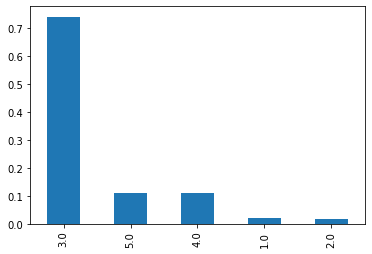

In [41]:
trump.covid_gov.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

#### 74% of Trump voters believe the government had the right resonse to Covid

In [42]:
trump.samesex.value_counts(normalize=True).sort_values(ascending=False)

1.0    0.512461
2.0    0.210280
6.0    0.090343
5.0    0.082555
3.0    0.066978
4.0    0.037383
Name: samesex, dtype: float64

<AxesSubplot:>

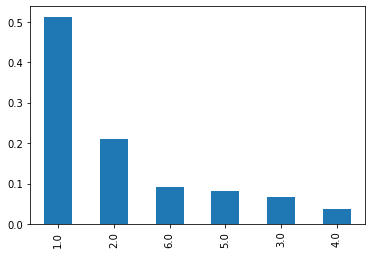

In [43]:
trump.samesex.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

#### About 72% of Trump voters moderately or strongly feel that businesses should be required to refuse services to same sex couples

In [44]:
trump.lgbtlaw.value_counts(normalize=True).sort_values(ascending=False)

1.0    0.566978
2.0    0.236760
4.0    0.116822
3.0    0.079439
Name: lgbtlaw, dtype: float64

<AxesSubplot:>

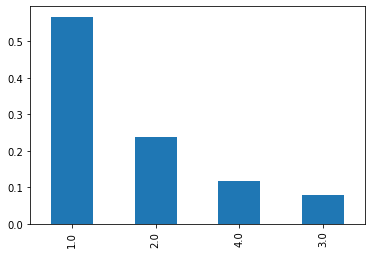

In [45]:
trump.lgbtlaw.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

#### Very interestingly, according to polling data, about 57% of Trump voters strongly favor laws that protect LBGT against job discrimination

In [46]:
trump.birthright.value_counts(normalize=True).sort_values(ascending=False)

1.0    0.311526
4.0    0.299065
2.0    0.143302
7.0    0.102804
6.0    0.084112
3.0    0.029595
5.0    0.029595
Name: birthright, dtype: float64

<AxesSubplot:>

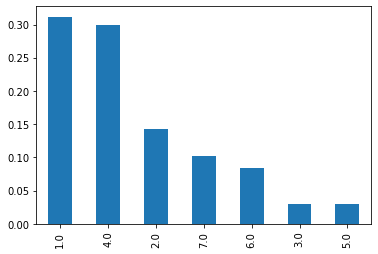

In [47]:
trump.birthright.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

#### Shocker Alert, only 31% of Trump voters strongly favor ending birthright citizenship; in the same token 30% really don't care

In [48]:
trump.income.value_counts(normalize=True).sort_values(ascending=False)

17.0    0.099688
19.0    0.080997
21.0    0.079439
1.0     0.074766
10.0    0.071651
22.0    0.068536
18.0    0.068536
20.0    0.057632
15.0    0.052960
16.0    0.051402
13.0    0.045171
14.0    0.043614
9.0     0.032710
11.0    0.032710
12.0    0.026480
8.0     0.024922
5.0     0.024922
7.0     0.017134
6.0     0.017134
4.0     0.014019
2.0     0.009346
3.0     0.006231
Name: income, dtype: float64

<AxesSubplot:>

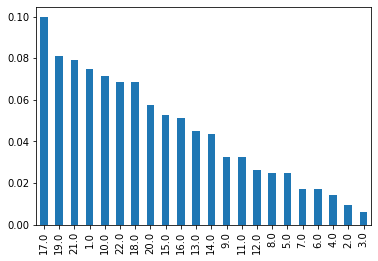

In [49]:
trump.income.value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

#### About 41% of Trump voters earn more than 100k per year

In [50]:
trump.describe()

,interest_politics,interest_campaign,state_reg,party_reg,primary_voter,pol_spectrum,party_id,party_salience,gov_trust,gov_interests,...,labor,union,ethnicity,children,income,health,getcovid,satisfied,region,whovoted
count,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,...,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.000000,642.0
mean,2.126168,1.557632,23.704050,2.392523,1.496885,5.520249,6.014019,3.129283,3.442368,1.180685,...,2.707165,1.852025,1.426791,0.750779,14.014019,2.429907,1.957944,2.137072,2.741433,2.0
std,0.930318,0.684538,14.536938,0.945541,0.500380,1.074623,1.298549,1.367251,0.871070,0.385057,...,2.236747,0.355352,1.168395,1.111649,6.171606,0.979785,0.200874,0.850748,1.129023,0.0
min,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.0
25%,1.000000,1.000000,10.250000,2.000000,1.000000,5.000000,5.000000,2.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,0.000000,10.000000,2.000000,2.000000,2.000000,2.000000,2.0
50%,2.000000,1.000000,22.000000,2.000000,1.000000,6.000000,7.000000,3.000000,4.000000,1.000000,...,1.000000,2.000000,1.000000,0.000000,16.000000,2.000000,2.000000,2.000000,3.000000,2.0
75%,3.000000,2.000000,37.000000,2.000000,2.000000,6.000000,7.000000,4.000000,4.000000,1.000000,...,5.000000,2.000000,1.000000,1.000000,19.000000,3.000000,2.000000,3.000000,4.000000,2.0
max,5.000000,3.000000,54.000000,5.000000,2.000000,7.000000,7.000000,5.000000,5.000000,2.000000,...,8.000000,2.000000,6.000000,4.000000,22.000000,5.000000,2.000000,5.000000,4.000000,2.0


In [54]:
# Create the model with scikit-learn
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
# Plot X independent variable (voter data) against y dependent variable
x = trump[['interest_politics', 'interest_campaign',
       'state_reg', 'party_reg', 'primary_voter', 'pol_spectrum', 'party_id',
       'party_salience', 'gov_trust', 'gov_interests', 'gov_waste',
       'gov_corrup', 'people_trusted', 'gov_responsive', 'better_economy',
       'better_health', 'better_immigratino', 'better_taxes',
       'better_environment', 'better_covid', 'fav_deathpen', 'stayhome',
       'trust_media', 'corr_trump', 'fav_impeach', 'fav_senacquittal',
       'covid_gov', 'covid_reopen', 'inc_gap', 'gov_climate', 'samesex',
       'transgender', 'lgbtlaw', 'birthright', 'deportkids', 'wall',
       'russianinterfere', 'religion', 'age', 'marital', 'education',
       'spouse_edu', 'armedforces', 'labor', 'union', 'ethnicity', 'children',
       'income', 'health', 'getcovid', 'satisfied', 'region']]
y = trump.whovoted

In [56]:
# Fit data into the model
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
# with statsmodels
constant = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               whovoted   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              8789.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):                        0.00
Time:                        19:34:16   Log-Likelihood:                          779.88
No. Observations:                 642   AIC:                                     -1456.
Df Residuals:                     590   BIC:                                     -1224.
Df Model:                          52                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
interest_politics      0.0036      0.004      0.882      0.378      -0.004       0.011
interest_campaign      0.0080      0.006      1.383      0.167      -0.003       0.019
state_reg              0.0010      0.000      4.117      0.000       0.001       0.001
party_reg              0.0120      0.004      3.314      0.001       0.005       0.019
primary_voter          0.0220      0.007      3.350      0.001       0.009       0.035
pol_spectrum           0.0131      0.004      3.666      0.000       0.006       0.020
party_id               0.0049      0.003      1.497      0.135      -0.002       0.011
party_salience         0.0075      0.002      3.036      0.003       0.003       0.012
gov_trust              0.0213      0.004      5.025      0.000       0.013       0.030
gov_interests          0.0169      0.009      1.783      0.075      -0.002       0.035
gov_waste              0.0193      0.008      2.435      0.015       0.004       0.035
gov_corrup             0.0087      0.004      2.055      0.040       0.000       0.017
people_trusted         0.0072      0.004      1.834      0.067      -0.001       0.015
gov_responsive         0.0207      0.005      3.959      0.000       0.010       0.031
better_economy         0.0159      0.006      2.462      0.014       0.003       0.029
better_health          0.0002      0.005      0.033      0.974      -0.009       0.009
better_immigratino     0.0214      0.005      3.926      0.000       0.011       0.032
better_taxes           0.0107      0.005      2.127      0.034       0.001       0.021
better_environment     0.0055      0.004      1.445      0.149      -0.002       0.013
better_covid           0.0016      0.005      0.335      0.738      -0.008       0.011
fav_deathpen           0.0060      0.004      1.573      0.116      -0.001       0.013
stayhome               0.0048      0.003      1.475      0.141      -0.002       0.011
trust_media            0.0164      0.005      3.622      0.000       0.008       0.025
corr_trump             0.0048      0.002      2.351      0.019       0.001       0.009
fav_impeach            0.0227      0.004      5.925      0.000       0.015       0.030
fav_senacquittal       0.0191      0.004      5.405      0.000       0.012       0.026
covid_gov              0.0325      0.004      7.483      0.000       0.024       0.041
covid_reopen           0.0089      0.003      3.028      0.003       0.003       0.015
inc_gap                0.0051      0.003      1.593      0.112      -0.001       0.011
gov_climate            0.0080      0.004      2.225      0.026       0.001       0.015
samesex                0.0061      0.002      2.694      0.007       0.002       0.010
transgender           -0.0

In [59]:
trump.interest_politics.describe()

count    642.000000
mean       2.126168
std        0.930318
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: interest_politics, dtype: float64

In [70]:
# Using pandas profiling package to streamline the data
#from pandas_profiling import ProfileReport
#trump_profile = ProfileReport(trump)
#trump_profile

In [71]:
# Generate html report
#trump_profile.to_file('trump_profile.html')

In [72]:
# Generate pdf report
#trump_profile.to_file('trump_profile.pdf')